# Retrieval results

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from netCDF4 import Dataset
import glob
import matplotlib.pyplot as plt
import numpy as np
from joint_flight.results import get_results, plot_results

No environment variable JOINT_FLIGHT_PATH found. Will look in /home/simonpf/src/joint_flightfor the joint flight data.


In [2]:
shapes = ["6-BulletRosette",
          "8-ColumnAggregate",
          "LargeColumnAggregate",
          "LargePlateAggregate",
          "EvansSnowAggregate"]
results_b984 = get_results("b984")
results_c159 = get_results("c159")
results_c161 = get_results("c161")

In [3]:
results_c161["LargePlateAggregate"]["y_cloud_sat"].shape

(422, 45)

## Residuals

/home/simonpf/src/joint_flight/joint_flight/__init__.py:2079: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/simonpf/src/joint_flight/joint_flight/__init__.py:2079: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/simonpf/src/joint_flight/joint_flight/__init__.py:2079: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


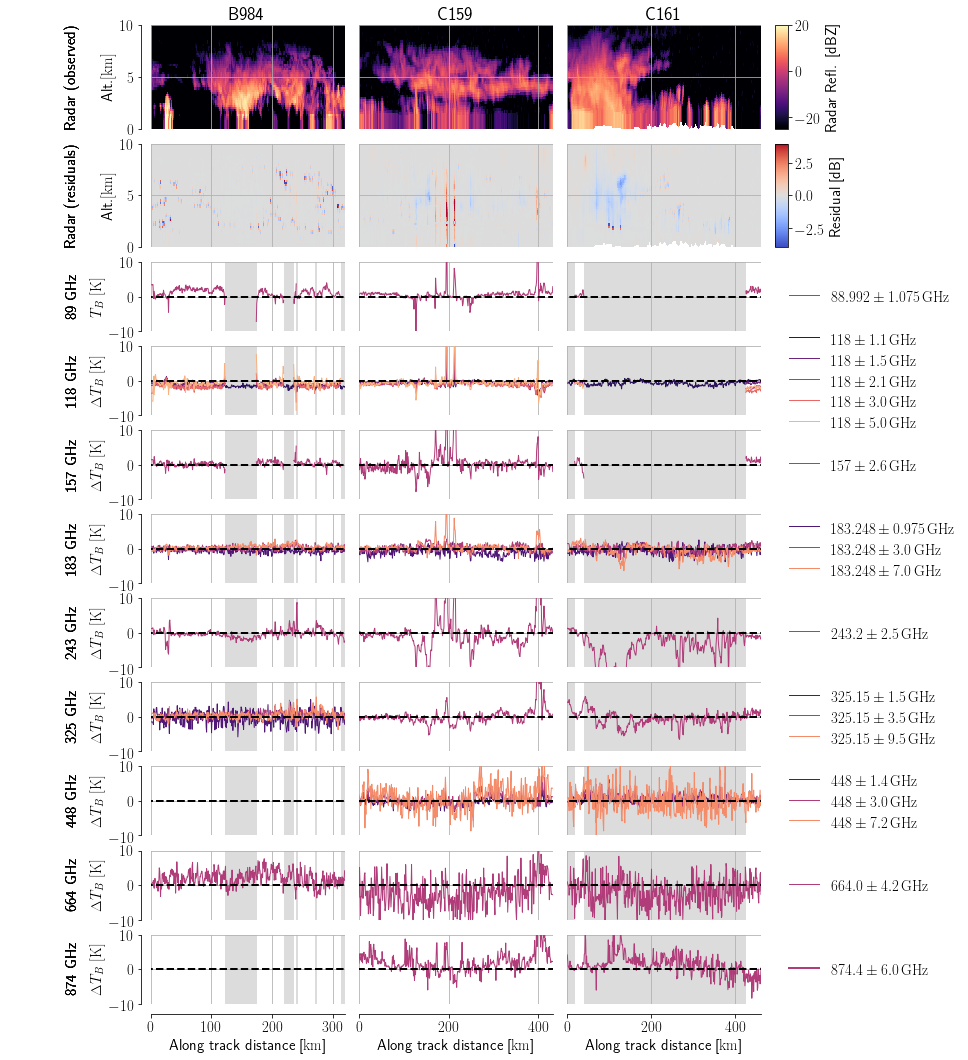

In [16]:
from matplotlib.gridspec import GridSpec
from joint_flight import plot_residuals
from joint_flight.data.b984 import RADAR as radar_b984
from joint_flight.data.c159 import RADAR as radar_c159
from joint_flight.data.c161 import RADAR as radar_c161
from joint_flight.data.b984 import ISMAR as ismar_b984
from joint_flight.data.c159 import ISMAR as ismar_c159
from joint_flight.data.c161 import ISMAR as ismar_c161
from joint_flight.data.b984 import SURFACE_MASK as surface_mask_b984
from joint_flight.data.c159 import SURFACE_MASK as surface_mask_c159
from joint_flight.data.c161 import SURFACE_MASK as surface_mask_c161
fig = plt.figure(figsize=(14, 18))
gs = GridSpec(11, 5,
              width_ratios=[1.0, 1.5, 1.5, 1.5, 0.1],
              height_ratios=[0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
             wspace=0.10)


ismar_b984.brightness_temperatures.data[:, [14, 15, 16]] = np.nan
ismar_b984.brightness_temperatures.data[:, -1] = np.nan
ismar_c159.brightness_temperatures.data[:, [7, 9]] = np.nan
ismar_c161.brightness_temperatures.data[:, [7, 9]] = np.nan

names_axs = [plt.subplot(gs[i, 0]) for i in range(11)]
legend_axs = [plt.subplot(gs[i, -1]) for i in range(11)]
axs_b984 = [plt.subplot(gs[i, 1]) for i in range(11)]
axs_c159 = [plt.subplot(gs[i, 2]) for i in range(11)]
axs_c161 = [plt.subplot(gs[i, 3]) for i in range(11)]

plot_residuals(radar_b984, results_b984["LargePlateAggregate"], "b984", surface_mask_b984, axs_b984, legend_axs, names_axs)
plot_residuals(radar_c159, results_c159["LargePlateAggregate"], "cxxx", surface_mask_c159, axs_c159, legend_axs, names_axs, y_axis=False)
plot_residuals(radar_c161, results_c161["LargePlateAggregate"], "cxxx", surface_mask_c161, axs_c161, legend_axs, names_axs, y_axis=False)

axs_b984[0].set_title("B984")
axs_c159[0].set_title("C159")
axs_c161[0].set_title("C161")

plt.show()

fig.savefig("../plots/retrieval_residuals.png", dpi=300, bbox_inches="tight")


No environment variable JOINT_FLIGHT_PATH found. Will look in /home/simonpf/src/joint_flightfor the joint flight data.


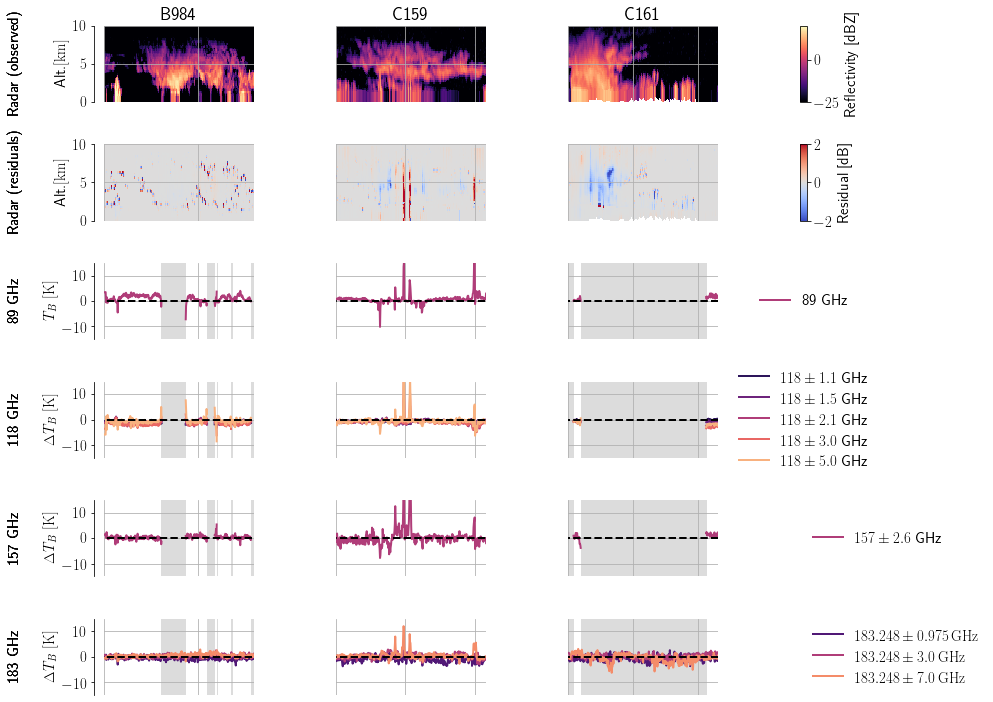

In [10]:
from matplotlib.gridspec import GridSpec
from joint_flight import plot_residuals_lf
from joint_flight.data.b984 import RADAR as radar_b984
from joint_flight.data.c159 import RADAR as radar_c159
from joint_flight.data.c161 import RADAR as radar_c161
from joint_flight.data.b984 import ISMAR as ismar_b984
from joint_flight.data.c159 import ISMAR as ismar_c159
from joint_flight.data.c161 import ISMAR as ismar_c161
from joint_flight.data.b984 import SURFACE_MASK as surface_mask_b984
from joint_flight.data.c159 import SURFACE_MASK as surface_mask_c159
from joint_flight.data.c161 import SURFACE_MASK as surface_mask_c161
fig = plt.figure(figsize=(14, 10))
gs = GridSpec(6, 5,
              width_ratios=[0.1, 1.0, 1.0, 1.0, 0.05]
             )


ismar_b984.brightness_temperatures.data[:, [14, 15, 16]] = np.nan
ismar_b984.brightness_temperatures.data[:, -1] = np.nan
ismar_c159.brightness_temperatures.data[:, [7, 9]] = np.nan
ismar_c161.brightness_temperatures.data[:, [7, 9]] = np.nan

names_axs = [plt.subplot(gs[i, 0]) for i in range(6)]
legend_axs = [plt.subplot(gs[i, -1]) for i in range(6)]
axs_b984 = [plt.subplot(gs[i, 1]) for i in range(6)]
axs_c159 = [plt.subplot(gs[i, 2]) for i in range(6)]
axs_c161 = [plt.subplot(gs[i, 3]) for i in range(6)]

plot_residuals_lf(radar_b984, results_b984["LargePlateAggregate"], "b984", surface_mask_b984, axs_b984, legend_axs, names_axs)
plot_residuals_lf(radar_c159, results_c159["LargePlateAggregate"], "cxxx", surface_mask_c159, axs_c159, legend_axs, names_axs, y_axis=False)
plot_residuals_lf(radar_c161, results_c161["LargePlateAggregate"], "cxxx", surface_mask_c161, axs_c161, legend_axs, names_axs, y_axis=False)

axs_b984[0].set_title("B984")
axs_c159[0].set_title("C159")
axs_c161[0].set_title("C161")

plt.tight_layout()
plt.show()

fig.savefig("../plots/retrieval_resduals_lf.png", dpi=300)

## Residual distributions

Object `sns.box` not found.


8212
8212
8212
8212
8212
6704
6704
6704
6704
6704
5628
5628
5628
5628
5628


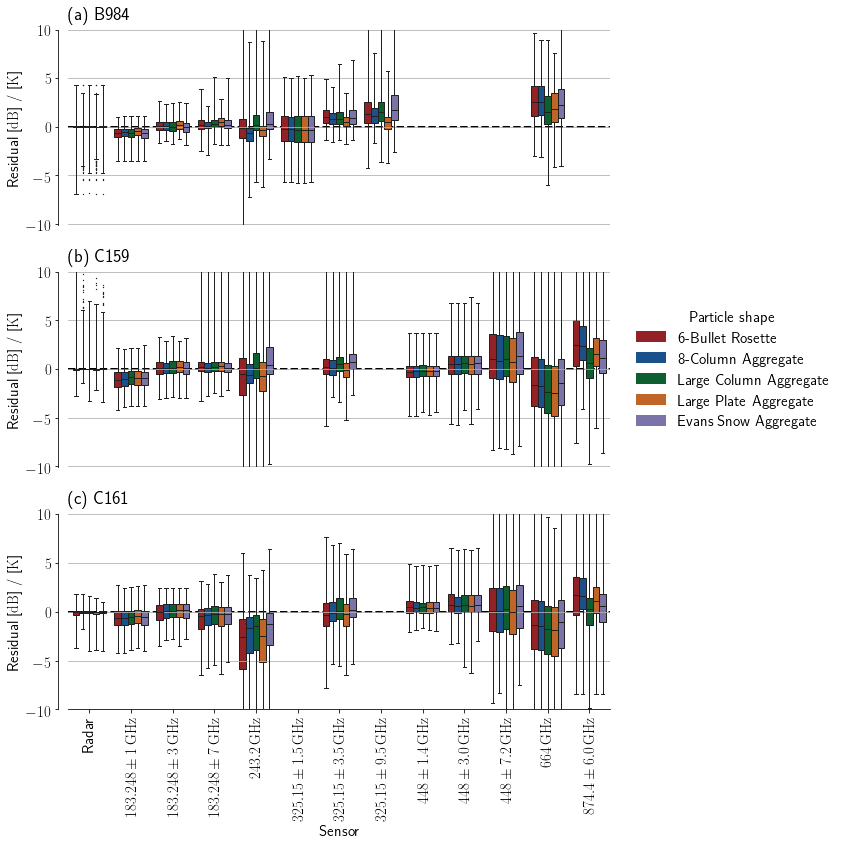

In [129]:
from joint_flight.results import plot_residual_distributions
from matplotlib.patches import Patch, PathPatch
from joint_flight.utils import PARTICLE_NAMES

f = plt.figure(figsize=(12, 12))
gs = GridSpec(3, 2, width_ratios=[1.0, 0.2])

ax_b984 = f.add_subplot(gs[0, 0])
ax_c159 = f.add_subplot(gs[1, 0])
ax_c161 = f.add_subplot(gs[2, 0])

ax_b984.set_title("(a) B984", loc="left", pad=10)
ax_b984.axhline(y=0, ls="--", c="k", zorder=-10)
data = plot_residual_distributions(ax_b984, radar_b984, results_b984, "b984", shapes=shapes)
ax_b984.get_legend().remove()
ax_b984.set_ylim([-10.1, 10])
ax_b984.xaxis.set_visible(False)
ax_b984.spines["bottom"].set_visible(False)
ax_b984.spines["left"].set_position(("outward", 10))
ax_b984.set_ylabel(r"Residual [$\si{\deci \bel}$] / [$\si{\kelvin}$]")

ax_c159.set_title("(b) C159", loc="left", pad=10)
ax_c159.axhline(y=0, ls="--", c="k", zorder=-10)
data = plot_residual_distributions(ax_c159, radar_c159, results_c159, "c159", shapes=shapes)
ax_c159.get_legend().remove()
ax_c159.set_ylim([-10.1, 10])
ax_c159.xaxis.set_visible(False)
ax_c159.spines["bottom"].set_visible(False)
ax_c159.spines["left"].set_position(("outward", 10))
ax_c159.set_ylabel(r"Residual [$\si{\deci \bel}$] / [$\si{\kelvin}$]")

ax_c161.set_title("(c) C161", loc="left", pad=10)
ax_c161.axhline(y=0, ls="--", c="k", zorder=-10)
data = plot_residual_distributions(ax_c161, radar_c161, results_c161, "c161", shapes=shapes)
ax_c161.get_legend().remove()
ax_c161.set_ylim([-10, 10])
ax_c161.spines["left"].set_position(("outward", 10))
ax_c161.set_xlabel(r"Sensor")
ax_c161.set_ylabel(r"Residual [$\si{\deci \bel}$] / [$\si{\kelvin}$]")

for l in ax_c161.xaxis.get_ticklabels():
    l.set_rotation(90)
    
labels = [(c.get_label(), c.get_facecolor()) for c in ax_c161.get_children() if c.get_label() in shapes]
patches = [Patch(facecolor=c, label=l) for l, c in labels]
ax = f.add_subplot(gs[:, -1])
ax.set_axis_off()
labels = [PARTICLE_NAMES[s] for s in shapes]
ax.legend(title="Particle shape", handles=patches, labels=labels, loc="center")

plt.tight_layout()
f.savefig("../plots/residual_distributions.pdf", dpi=300)

In [131]:
plt.boxplot?

/home/simonpf/src/joint_flight/joint_flight/results.py:414: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  #           cmap="magma",
/home/simonpf/src/joint_flight/joint_flight/results.py:414: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  #           cmap="magma",
/home/simonpf/src/joint_flight/joint_flight/results.py:414: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corne

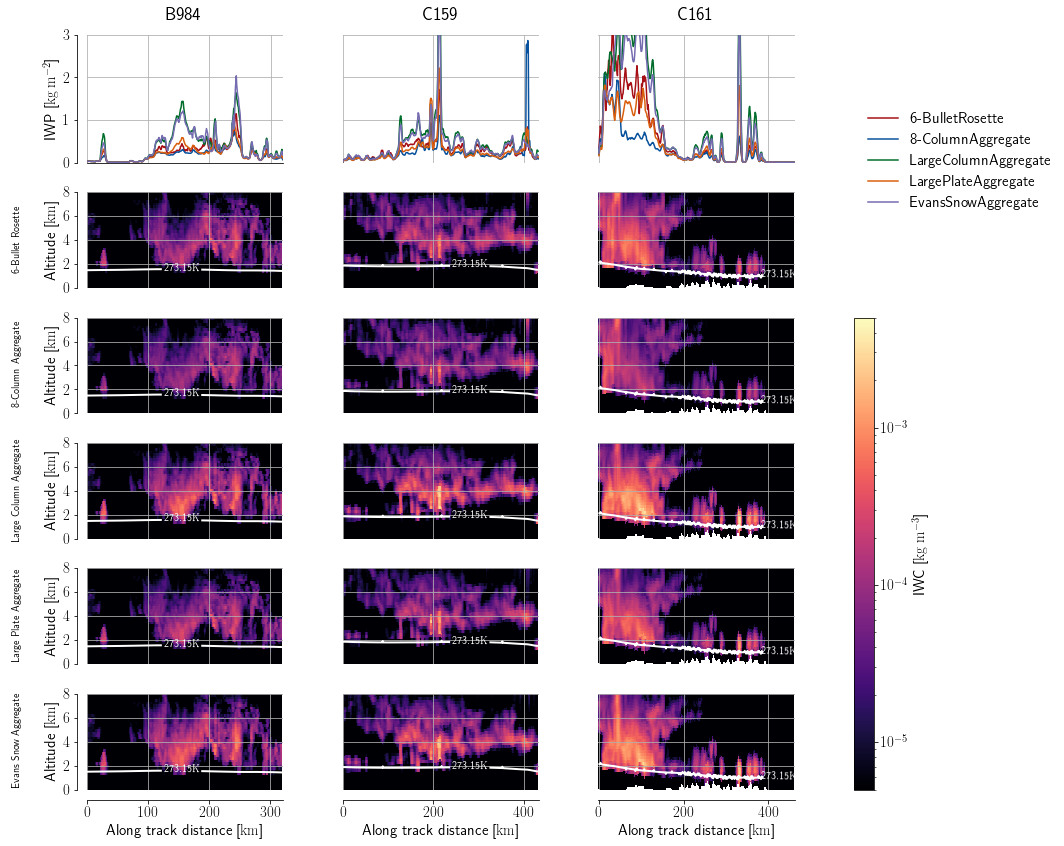

In [130]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from joint_flight.data.b984 import RADAR as radar_b984
from joint_flight.data.c159 import RADAR as radar_c159
from joint_flight.data.c161 import RADAR as radar_c161
from joint_flight.data.b984 import ATMOSPHERE as atmosphere_b984
from joint_flight.data.c159 import ATMOSPHERE as atmosphere_c159
from joint_flight.data.c161 import ATMOSPHERE as atmosphere_c161

m = len(shapes) + 1
gs = GridSpec(m, 5,
              width_ratios=[0.1, 1.0, 1.0, 1.0, 0.1],
              height_ratios=[1.0] + len(shapes) * [0.75])
f = plt.figure(figsize=(15, 12))
names = [f.add_subplot(gs[i, 0]) for i in range(m)]
axs_b984 = [f.add_subplot(gs[i, 1]) for i in range(m)]
axs_c159 = [f.add_subplot(gs[i, 2]) for i in range(m)]
axs_c161 = [f.add_subplot(gs[i, 3]) for i in range(m)]
legends = [f.add_subplot(gs[:2, -1]), f.add_subplot(gs[2:, -1])]

plot_results(radar_b984, results_b984, atmosphere_b984, axs=axs_b984, legends=legends, shapes=shapes, names=names)
plot_results(radar_c159, results_c159, atmosphere_c159, axs=axs_c159, shapes=shapes, y_axis=False)
plot_results(radar_c161, results_c161, atmosphere_c161, axs=axs_c161, shapes=shapes, y_axis=False)
axs_b984[0].set_title("B984", weight="bold", pad=15)
axs_c159[0].set_title("C159", weight="bold", pad=15)
axs_c161[0].set_title("C161", weight="bold", pad=15)

plt.tight_layout()
plt.show()
f.savefig("../plots/ice_water_content.png")

## Comparison to nevzorov data

In [53]:
from joint_flight.data.b984 import NEVZOROV as nevzorov_b984
from joint_flight.data.c159 import NEVZOROV as nevzorov_c159
from joint_flight.results import match_bulk_properties

In [72]:
from joint_flight.results import get_distance_mask, get_domain_mask
results_b984 = {k: results_b984[k] for k in shapes}
results_c159 = {k: results_c159[k] for k in shapes}
#nevzorov_c159["d"] += 40e3
mask_b984 = get_distance_mask(radar_b984, nevzorov_b984)
mask_c159 = get_domain_mask(radar_c159, 50e3, 150e3, nevzorov_c159)
matched_b984 = match_bulk_properties(results_b984,
                                     mask_b984,
                                     radar_b984,
                                     nevzorov_b984)
matched_c159 = match_bulk_properties(results_c159,
                                     mask_c159,
                                     radar_c159,
                                     nevzorov_c159)

/home/simonpf/src/joint_flight/joint_flight/results.py:516: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad((0, 0, 0, 0))
/home/simonpf/src/joint_flight/joint_flight/results.py:516: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad((0, 0, 0, 0))


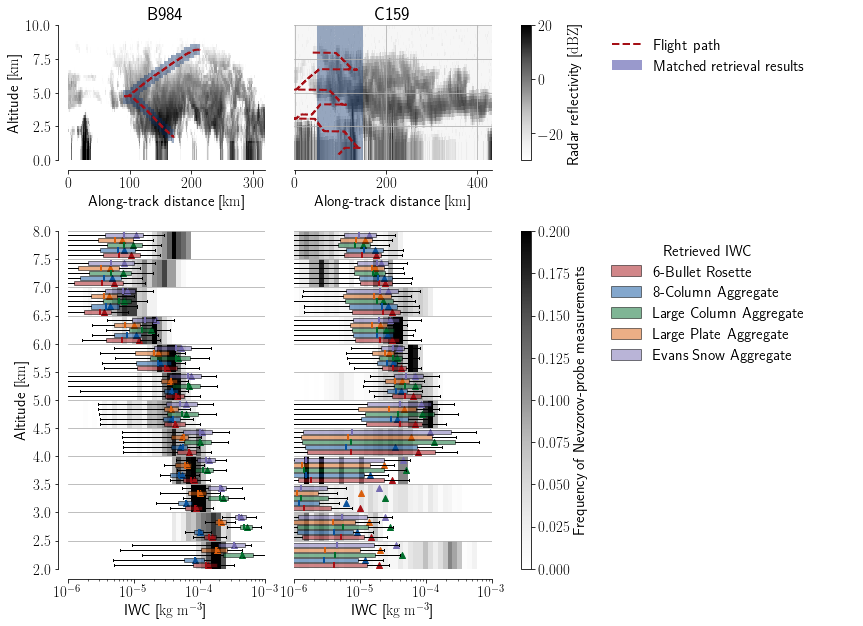

In [95]:
from joint_flight.results import plot_bulk_properties
from matplotlib.gridspec import GridSpec

f = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 5, height_ratios=[0.4, 1.0], width_ratios=[0.1, 1.0, 1.0, 0.05, 1.5], wspace=0.2, hspace=0.3)
axs_b984 = [f.add_subplot(gs[i, 1]) for i in range(2)]
axs_c159 = [f.add_subplot(gs[i, 2]) for i in range(2)]
cbs = [f.add_subplot(gs[i, 3]) for i in range(2)]
legends = [f.add_subplot(gs[i, 4]) for i in range(2)]

plot_bulk_properties(nevzorov_b984,
                     matched_b984,
                     radar_b984,
                     mask_b984,
                     cbs=cbs,
                     shapes=shapes,
                     axs=axs_b984)
plot_bulk_properties(nevzorov_c159,
                     matched_c159,
                     radar_c159,
                     mask_c159,
                     axs=axs_c159,
                     cbs=cbs,
                     shapes=shapes,
                     legends=legends,
                     y_axis=False)
axs_b984[0].set_title("B984", loc="center")
axs_c159[0].set_title("C159", loc="center")
f.savefig("../plots/in_situ_iwc.png", dpi=300, bbox_inches="tight")

In [ ]:
from joint_flight.results import calculate_psds
psd_r_b984 = calculate_psds(results_b984,
                            mask_b984,
                            radar_b984)
psd_r_c159 = calculate_psds(results_c159,
                            mask_c159,
                            radar_c159)

/home/simonpf/src/joint_flight/joint_flight/results.py:770: RuntimeWarning: Mean of empty slice
  x = psds_r[s]["d_max"].data
/home/simonpf/src/joint_flight/joint_flight/results.py:770: RuntimeWarning: Mean of empty slice
  x = psds_r[s]["d_max"].data
/home/simonpf/src/joint_flight/joint_flight/results.py:770: RuntimeWarning: Mean of empty slice
  x = psds_r[s]["d_max"].data
/home/simonpf/src/joint_flight/joint_flight/results.py:770: RuntimeWarning: Mean of empty slice
  x = psds_r[s]["d_max"].data
/home/simonpf/src/joint_flight/joint_flight/results.py:770: RuntimeWarning: Mean of empty slice
  x = psds_r[s]["d_max"].data
/home/simonpf/src/joint_flight/joint_flight/results.py:770: RuntimeWarning: Mean of empty slice
  x = psds_r[s]["d_max"].data
/home/simonpf/src/joint_flight/joint_flight/results.py:770: RuntimeWarning: Mean of empty slice
  x = psds_r[s]["d_max"].data
/home/simonpf/src/joint_flight/joint_flight/results.py:770: RuntimeWarning: Mean of empty slice
  x = psds_r[s]["d_max

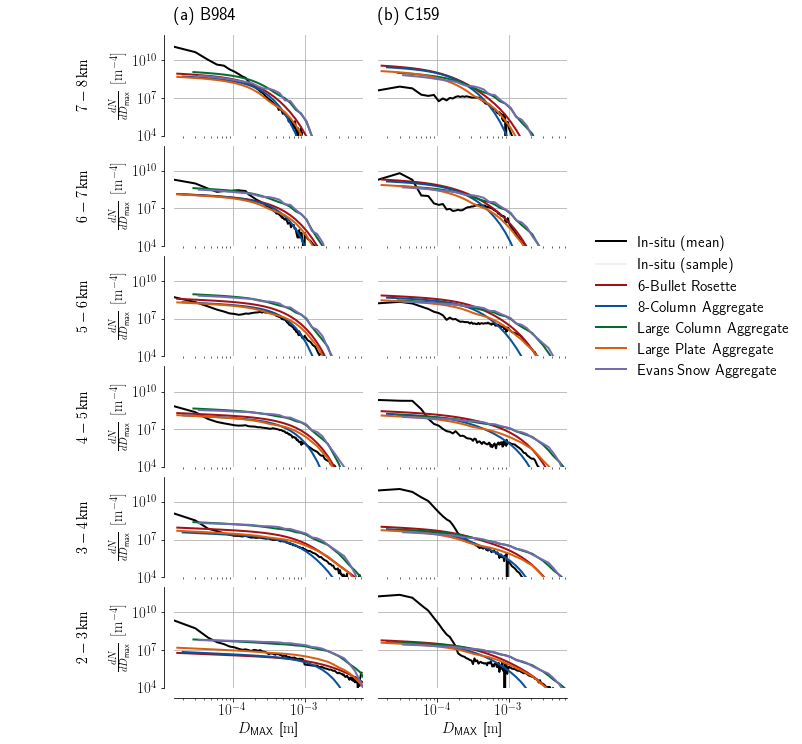

In [49]:
from joint_flight.data.b984 import PSD as psd_b984
from joint_flight.data.c159 import PSD as psd_c159
from joint_flight.results import plot_psds
psd_b984 = psd_b984.resample(time="10s").mean()
psd_c159 = psd_c159.resample(time="10s").mean()
nevzorov_b984 = nevzorov_b984.resample(time="10s").mean()
nevzorov_c159 = nevzorov_c159.resample(time="10s").mean()

fig = plt.figure(figsize=(12, 12))
gs = GridSpec(6, 4, width_ratios=[0.8, 1.0, 1.0, 0.5], wspace=0.1, hspace=0.1)

names_axs = [plt.subplot(gs[i, 0]) for i in range(6)]
legend_axs = [plt.subplot(gs[i, -1]) for i in range(6)]
axs_b984 = [plt.subplot(gs[i, 1]) for i in range(6)]
axs_c159 = [plt.subplot(gs[i, 2], sharey=axs_b984[i]) for i in range(6)]

plot_psds(psd_b984,
          psd_r_b984,
          axs=axs_b984,
          legends=legend_axs,
          shapes=shapes,
          names=names_axs)
plot_psds(psd_c159,
          psd_r_c159,
          axs=axs_c159,
          legends=legend_axs,
          names=names_axs,
          shapes=shapes,
          y_axis=False)
axs_b984[0].set_title("(a) B984", loc="left", pad=15)
axs_c159[0].set_title("(b) C159", loc="left", pad=15)
plt.show()
fig.savefig("../plots/in_situ_psds.pdf", dpi=300, bbox_inches="tight")

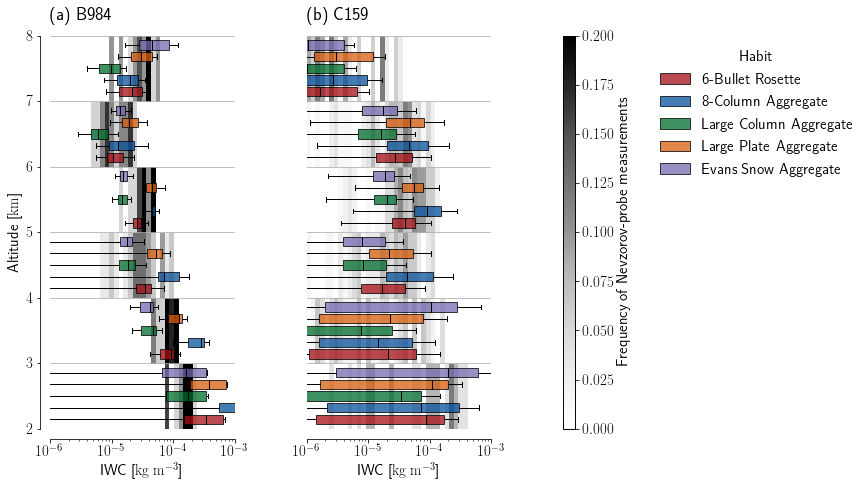

In [18]:
from joint_flight.results import plot_psd_mass
from joint_flight.data.b984 import PSD as psd_b984
from joint_flight.data.c159 import PSD as psd_c159
from joint_flight.results import plot_psds
psd_b984 = psd_b984.resample(time="10s").mean()
psd_c159 = psd_c159.resample(time="10s").mean()
nevzorov_b984 = nevzorov_b984.resample(time="10s").mean()
nevzorov_c159 = nevzorov_c159.resample(time="10s").mean()

fig = plt.figure(figsize=(12, 7))
gs = GridSpec(1, 4, width_ratios=[1.2, 1.2, 0.075, 0.5])

axs_b984 = [fig.add_subplot(gs[i, 0]) for i in range(1)]
axs_c159 = [fig.add_subplot(gs[i, 1]) for i in range(1)]
cbs = [fig.add_subplot(gs[i, 2]) for i in range(1)]
legend_axs = [fig.add_subplot(gs[i, 3]) for i in range(1)]

plot_psd_mass(psd_b984,
              nevzorov_b984,
              axs=axs_b984,
              legends=legend_axs,
              shapes=shapes,
              cbs=cbs,
              names=names_axs)
plot_psd_mass(psd_c159,
              nevzorov_c159,
              axs=axs_c159,
              legends=legend_axs,
              shapes=shapes,
              cbs=cbs,
              names=names_axs,
              y_axis=False)
axs_b984[0].set_title("(a) B984", loc="left", pad=15)
axs_c159[0].set_title("(b) C159", loc="left", pad=15)
plt.tight_layout()
plt.show()

fig.savefig("../plots/mass_size_relations.png", dpi=200)

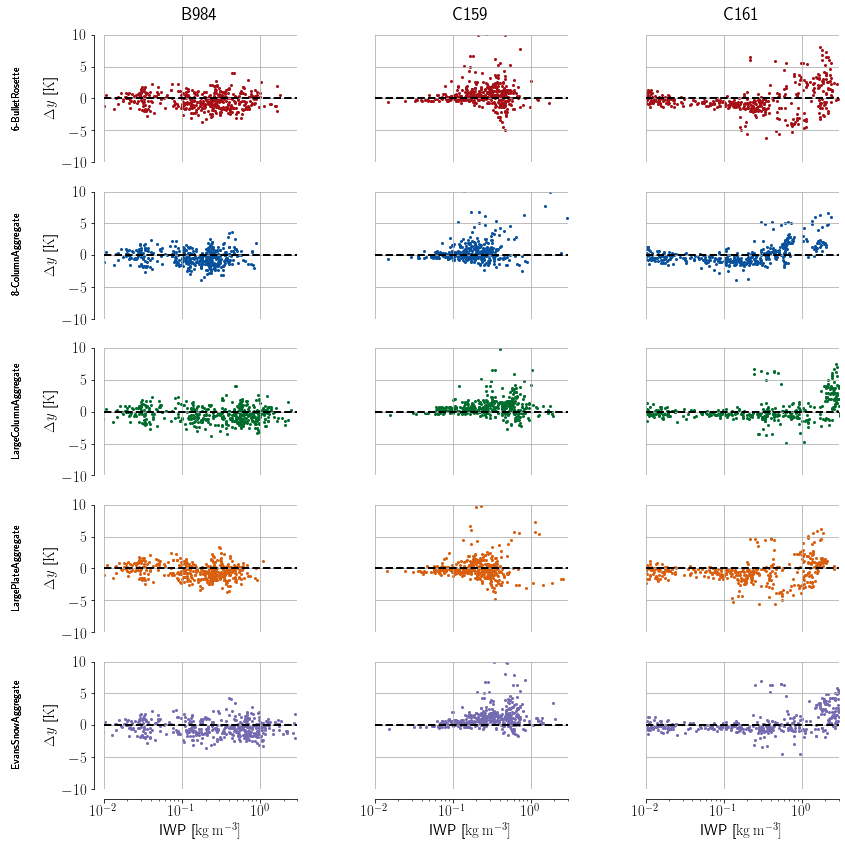

In [20]:
from joint_flight.results import scatter_residuals

f = plt.figure(figsize=(12, 12))
gs = GridSpec(5, 4, width_ratios=[0.1] + 3 * [1.0])

names = [f.add_subplot(gs[i, 0]) for i in range(5)]
axs_b984 = [f.add_subplot(gs[i, 1]) for i in range(5)]
axs_c159 = [f.add_subplot(gs[i, 2]) for i in range(5)]
axs_c161 = [f.add_subplot(gs[i, 3]) for i in range(5)]

scatter_residuals(radar_b984,
                  results_b984,
                  "b984",
                  shapes=shapes,
                  axs=axs_b984,
                  names=names)
scatter_residuals(radar_c159,
                  results_c159,
                  "c159",
                  shapes=shapes,
                  axs=axs_c159,
                  y_axis = False,
                  names=names)
scatter_residuals(radar_c161,
                  results_c161,
                  "c161",
                  shapes=shapes,
                  axs=axs_c161,
                  y_axis = False,
                  names=names)
axs_b984[0].set_title("B984", loc="center", pad=15)
axs_c159[0].set_title("C159", loc="center", pad=15)
axs_c161[0].set_title("C161", loc="center", pad=15)
plt.tight_layout()
f.savefig("../plots/residuals_scatter.png", dpi=300, bbox_inches="tight")